In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import torch
from torch.utils import tensorboard
import pickle

In [2]:
df = pd.read_csv('IRIS_ Flower_Dataset.csv')
df.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [3]:
df.describe()


sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

C:\Users\jeanb\OneDrive - De Vinci\Bureau\ESILV\Irlande\karibou\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jeanb\OneDrive - De Vinci\Bureau\ESILV\Irlande\karibou\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jeanb\OneDrive - De Vinci\Bureau\ESILV\Irlande\karibou\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jeanb\OneDrive - De Vinci\Bureau\ESILV\Irlande\karibou\Lib\site-packages\seaborn\_oldcore.py:1498: FutureW

C:\Users\jeanb\OneDrive - De Vinci\Bureau\ESILV\Irlande\karibou\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jeanb\OneDrive - De Vinci\Bureau\ESILV\Irlande\karibou\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jeanb\OneDrive - De Vinci\Bureau\ESILV\Irlande\karibou\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jeanb\OneDrive - De Vinci\Bureau\ESILV\Irlande\karibou\Lib\site-packages\seaborn\_oldcore.py:1498: FutureW

C:\Users\jeanb\OneDrive - De Vinci\Bureau\ESILV\Irlande\karibou\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


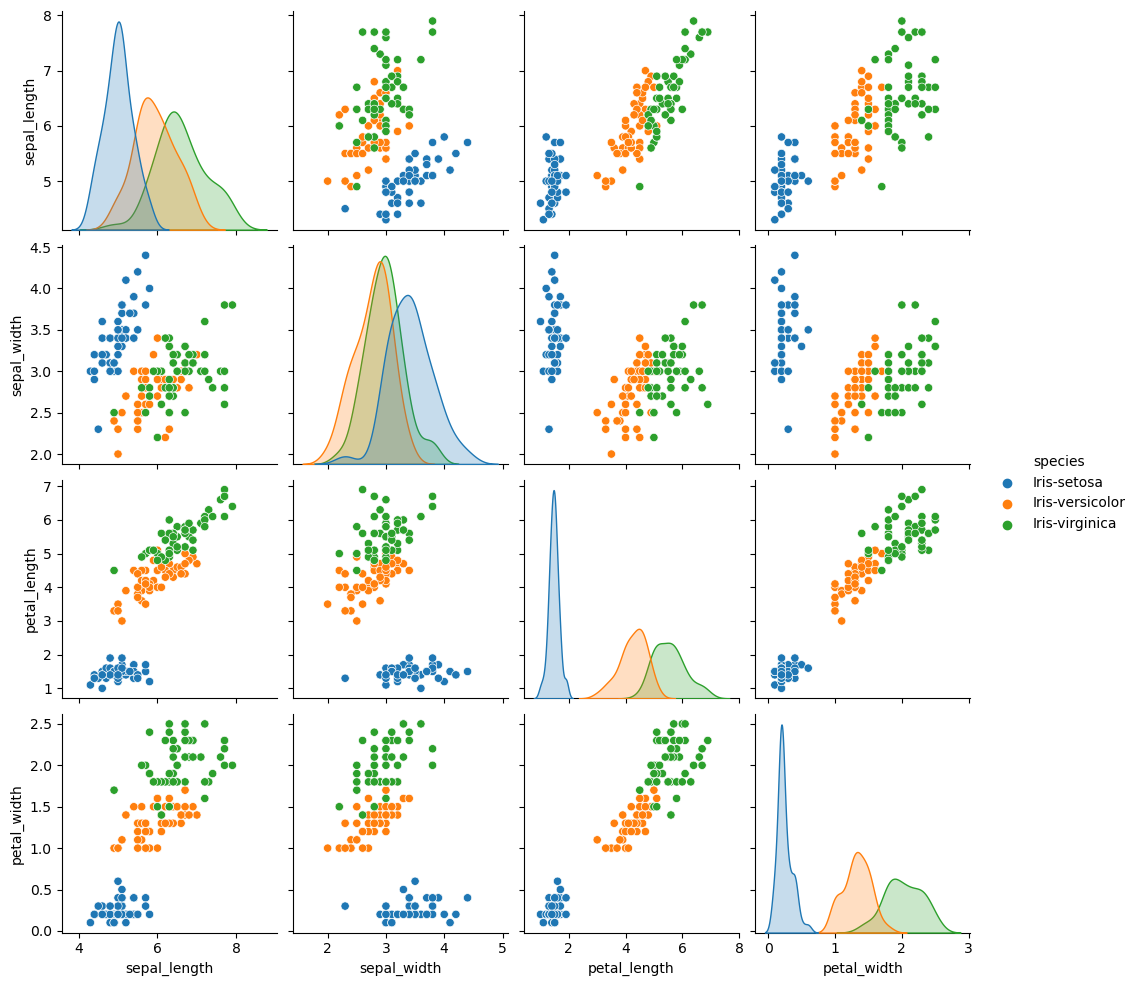

In [4]:
sns.pairplot(df,hue="species")

In [5]:
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [6]:
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(4)
width = 0.25

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [9]:
predictions = svn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

In [10]:
with open('models/FlowersSVN.pkl','wb')as f:
    pickle.dump(svn,f)
print(svn)

SVC()


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



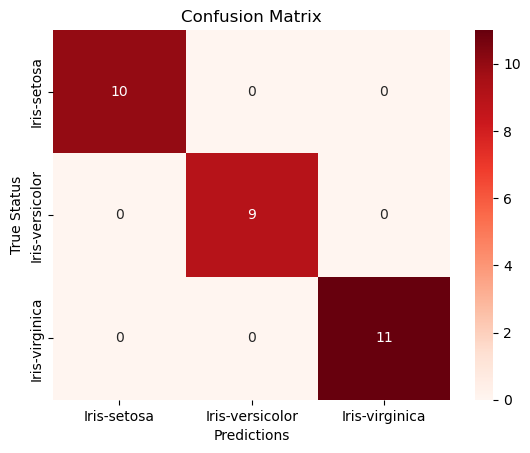

In [12]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
            yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Status')
plt.show()